# K-means 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def should_stop(old_centroids, centroids, iterations, max_it):
    if iterations > max_it:
        return True
    return np.array_equal(old_centroids, centroids)

def updata_lables(data_set, centroids):
    num_point, num_dim = data_set.shape
    for i in range(0, num_point):
        data_set[i, -1] = get_label_from_closest_centroid(data_set[i, :-1], centroids)

def get_label_from_closest_centroid(data_set_row, centroids):
    label = centroids[0, -1]
    min_dist = np.linalg.norm(data_set_row - centroids[0, :-1])
    for i in range(1, centroids.shape[0]):
        dist = np.linalg.norm(data_set_row - centroids[i, :-1])
        if dist < min_dist:
            min_dist = dist
            label = centroids[i, -1]
    return label


def get_centroids(data_set, k):
    result = np.zeros((k, data_set.shape[1]))
    for i in range(1, k + 1):
        one_cluster = data_set[data_set[:, -1] == i, :-1]
        result[i - 1, :-1] = np.mean(one_cluster, axis=0)
        result[i - 1, -1] = i
    return result

def kmeans(X, k, max_it):
    num_point, num_dim = X.shape
    data_set = np.zeros((num_point, num_dim + 1))
    data_set[:, :-1] = X
      
    centroids = data_set[np.random.randint(num_point, size=k)]
    centroids[:, -1] = range(1, k + 1)
    
    iterations = 0
    old_centroids = None
        
    while not should_stop(old_centroids, centroids, iterations, max_it):
       
        old_centroids = np.copy(centroids)
        iterations += 1
        
        updata_lables(data_set, centroids)
        
        centroids = get_centroids(data_set, k)
        
    return data_set
        

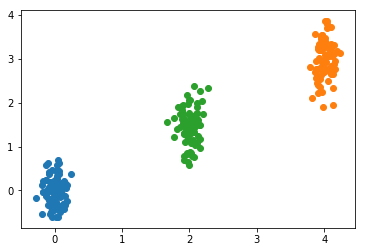

In [3]:
X1 = np.empty((100, 2))
X1[:, 0] = np.random.normal(0, 0.1, size=100)
X1[:, 1] = 0.75 * X1[:, 0] + np.random.normal(0, 0.3, size=100)

X2 = np.empty((80, 2))
X2[:, 0] = np.random.normal(0, 0.1, size=80) + 4
X2[:, 1] = 0.75 * X2[:, 0] + np.random.normal(0, 0.4, size=80)


X3 = np.empty((80, 2))
X3[:, 0] = np.random.normal(0, 0.1, size=80) + 2
X3[:, 1] = 0.75 * X3[:, 0] + np.random.normal(0, 0.4, size=80)


plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.scatter(X3[:, 0], X3[:, 1])


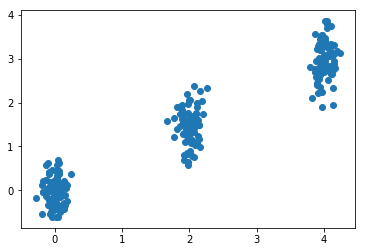

In [4]:
X = np.vstack((X1, X2, X3))

plt.scatter(X[:, 0], X[:, 1])

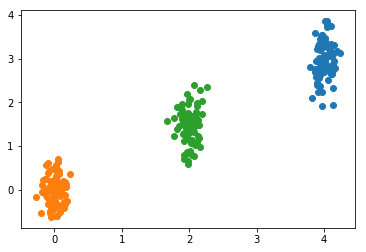

In [5]:
result = kmeans(X, 3, 50)
result.shape
plt.scatter(result[result[:, 2] == 1, 0], result[result[:, 2] == 1, 1])
plt.scatter(result[result[:, 2] == 2, 0], result[result[:, 2] == 2, 1])
plt.scatter(result[result[:, 2] == 3, 0], result[result[:, 2] == 3, 1])

## scikit-learn 中的 KMeans

In [6]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(X)
Y = k_means.labels_

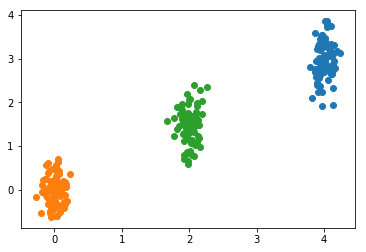

In [7]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
plt.scatter(X[Y == 2, 0], X[Y == 2, 1])